In [22]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
import pandas as pd
import os
import sys
import numpy as np
sys.path.append("../../Code")
import utils
import files as f
import seaborn as sns
import matplotlib.pyplot as plt
import profiles
stopWords = set(stopwords.words('english'))
import languages as lang

In [135]:
vocab_reviews = pd.read_csv(os.path.join('..','2','nr_restrict_reviews.csv'), index_col=0)
vocab_guests = pd.read_csv(os.path.join('..','5','guest_profile_spell.csv'), index_col=0)
vocab_hosts = pd.read_csv(os.path.join('..','5','host_profile_spell.csv'), index_col=0)
vocab_guests['id'] = vocab_guests['id'].astype(str)

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [180]:
vocab_guests['id'] = vocab_guests['id'].astype(str)

In [181]:
vocab_hosts['id'] = vocab_hosts['id'].astype(str)

In [182]:
data = pd.concat([vocab_guests[['id', 'description']], vocab_hosts[['id', 'about']].rename(columns={'about': 'description'})]).reset_index()

In [183]:
len(data)

103179

In [184]:
data = data.drop_duplicates()

In [185]:
len(data)

103179

In [186]:
len(data[data.description.isnull()])

46174

In [187]:
format(50521*100/114018, '.2f')

'44.31'

In [188]:
data = data[~data.description.isnull()]

In [189]:
pd.options.display.max_colwidth = 500

## STILL DO : How many are guests , how many are hosts 

In [190]:
print('Blank Host profiles: %.2f %%' % float(len(vocab_hosts[vocab_hosts['about'].isnull()])*100/len(vocab_hosts)))

Blank Host profiles: 31.89 %


In [191]:
print('Blank Guest profiles: %.2f %%' % float(len(vocab_guests[vocab_guests['description'].isnull()])*100/len(vocab_guests)))

Blank Guest profiles: 45.68 %


# STILL TO DO : How many are hosts and Guests

In [192]:
h_and_g = set(vocab_guests['id']).intersection(set(vocab_hosts['id']))

In [193]:
len(h_and_g)

113

# Create Vocabulary 

In [194]:
profiles_encoded, vocab_count, vocab, idf = lang.pipeline(data, 'description', stopWords)

In [195]:
vocab_table = lang.create_vocab_count_table(vocab_count)

In [196]:
vocab_table.sort_values(by='counts', ascending=False).head(50)

,counts,word
50,26083,love
5,21455,I'm
20,19940,travel
145,14701,new
12,11964,like
54,10805,people
113,9464,live
220,9170,work
435,8850,years
57,8531,enjoy


In [197]:
len(vocab)

51166

In [198]:
inverted_vocab = utils.invert_dict(vocab)

In [199]:
data.description[1]

'Fun and friendly world traveler!'

In [200]:
profiles_encoded[data.id[1]]

[1, 2, 3, 4]

In [201]:
vocab['Website']

935

# Load Relevant profiles

In [202]:
reviews = pd.read_csv(os.path.join('..','2','nr_restrict_reviews.csv'), index_col=0)
guests = pd.read_csv(os.path.join('..','5','guest_profile_spell.csv'), index_col=0)
hosts = pd.read_csv(os.path.join('..','5','host_profile_spell.csv'), index_col=0)
guests['id'] = guests['id'].astype(str)

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [203]:
guests['id'] = guests['id'].astype(str)

In [204]:
hosts['id'] = hosts['id'].astype(str)

In [205]:
listings = pd.read_csv(os.path.join('..','2','nr_restrict_listings.csv'), index_col=0)

## Vector Representations

### Bag of Words - Vocabulary

#### Setup

In [206]:
profiles_vec = profiles.create_representation_bow(profiles_encoded, len(vocab))

In [207]:
profiles_freq = profiles.create_representation_bow(profiles_encoded, len(vocab), 'frequency')

#### Test

## Language Model Representation

#### Setup 

In [208]:
len(hosts)

6924

In [209]:
hosts = hosts[~hosts['about'].isnull()]

In [210]:
100 - len(hosts)*100/6926

31.90874963904129

In [211]:
len(guests)

96255

In [212]:
guests = guests[~guests['description'].isnull()]

In [213]:
100 - len(guests)*100/101288

48.375918173919914

In [214]:
len(reviews)

215960

In [215]:
reviews = reviews[(reviews['recipient_id'].isin(hosts['id'].unique())) & (reviews['reviewer_id'].isin(guests['id'].unique()))]

In [216]:
len(reviews)

51784

In [217]:
100 - len(reviews)*100/215960

76.02148546027041

In [218]:
hosts[hosts['id'] == 8967]

,id,name,since,location,about,response_time,response_rate,is_superhost,neighbourhood,listings_count,...,verifications,has_profile_pic,identity_verified,calculated_listings_count,num_of_cancellations,google_langs,google_langs_conf,token_len,isTranslated,isCorrected


# Distribution of Host About Length 

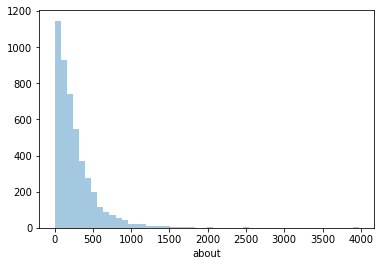

In [219]:
sns.distplot(hosts['about'].str.len(), kde=False)
plt.show()

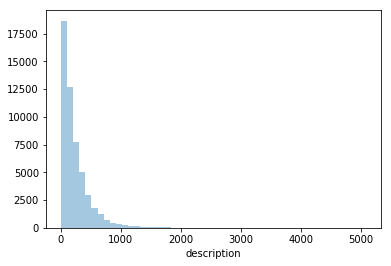

In [220]:
sns.distplot(guests['description'].str.len(), kde=False)
plt.show()

## Distance 1: Compute Cosine Similarity 

#### Add Cosine Similarity to Feature Table

In [221]:
reviews_X = profiles.add_cosine_similarity(reviews, profiles_vec)

../../Code/profiles.py:14: RuntimeWarning: invalid value encountered in double_scalars
  return (vec_x.T.dot(vec_y))/(np.sqrt(np.sum(vec_x)**2)*np.sqrt(np.sum(vec_y)**2))


In [222]:
import numpy as np
np.set_printoptions(threshold=np.nan)

In [223]:
profiles.cosine_similarity(vec_x=profiles_vec['8967'], vec_y=profiles_vec['1784456'])

0.0

In [224]:
reviews_X = profiles.add_tfidf(reviews_X, profiles_vec, profiles_freq, idf)

#### Add Sentiment Scores

In [225]:
sent_reviews = pd.read_csv(os.path.join('..','3','satisfaction_scores.csv'), index_col=0)

In [227]:
reviews_X = reviews_X.join(sent_reviews[['id', 'satisfaction']].set_index('id'), on='id')

In [241]:
reviews_X[~reviews_X.cosine_similarity.isnull()]

,idGuestReview,id,date,reviewer_id,listing_id,recipient_id,comments,hostCancelled,token_len,num_of_sents,google_langs,google_langs_conf,langdetect_langs,langdetect_langs_conf,other_langs,translated,cosine_similarity,tfidf,satisfaction
203,441,22938,2010-01-03,61471,4989,7118,Good location - easy access to Times Square and the subway. Apartment was a tight squeeze for 4 girls but loved the home deco and the cosy feel! Russell was very helpful. Great rooftop! Would recommend for 3 or less people.,N,40,5,en,1.0,en,0.999997,0,NaN,0.000000,0.000000,0.763902
206,444,843520,2012-01-06,1357796,4989,7118,A great apartment in the perfect location. I would stay here again if I am ever back in New York.,N,20,2,en,1.0,en,0.999998,0,NaN,0.004444,0.986609,0.623060
207,445,993034,2012-03-12,1757830,4989,7118,Russ is an amazing host and his awesome apartment is located in a neighborhood with multiple dining options. It is close to all the touristy attractions BUT not too close. The rooftop has a great view. We were in Soho in 5-10 minutes or Brooklyn in 20-30 minutes via the subway lines. Russ took the time to come over and personally attend to our needs when we required some internet assistance.,N,73,5,en,1.0,en,0.999995,0,NaN,0.003704,0.986609,0.704661
208,446,1119849,2012-04-12,2019278,4989,7118,"The apartment was really nice, like in the pictures. It is in a good location.",N,15,2,en,1.0,en,0.999996,0,NaN,0.000000,0.000000,0.692931
209,447,1129816,2012-04-14,1857814,4989,7118,"Great location! It was stylish, fun and smelled great! We didn' t meet but he communictated well and he had nice friends that helped out when needed. thank youuuu!!",N,29,5,en,1.0,en,0.999998,['so'],"Great location!It was stylish, fun and smelled great!We didn' t meet but he communictated well and he had nice friends that helped out when needed.thank youuuu!!",0.000000,0.000000,0.776882
210,448,1292160,2012-05-16,161198,4989,7118,"Russ was very nice with us, so was his neighbour David. The flat is very well located, just a few blocks from the subway and Times square. The roof offers a nice view over the area and Manhattan buildings. It's not really spacious but eveything's in it.",N,47,4,en,1.0,en,0.999997,0,NaN,0.000000,0.000000,0.625669
211,449,1624497,2012-07-03,1810355,4989,7118,Excellent location. Small and a little cramped for 3 people but clean and has everything you need.,N,17,2,en,1.0,en,0.999997,['fr'],Excellent location.Small and a little cramped for 3 people but clean and has everything you need.,0.000000,0.000000,0.544707
213,451,4737934,2013-05-22,6043058,4989,7118,"Russell was great to make his place become available with very short notice. Location was ideal for us. Although we never met in person the communication with Russell was great and he was quick to answer emails and assisting our enquiries. The apt is rather tight and would be recommended for 1-2 people. Interior creative and fun . On the downside a bit dusty, futon bed broken and uncomfortable and there is dog hair. Still overall a good experience.",N,79,7,en,1.0,en,0.999998,0,NaN,0.002096,1.691538,0.660760
217,455,48226234,2015-09-24,6458814,4989,7118,"Russ' appartment was great!!! The location is perfect, you are five minutes walk to everywhere. Hell's kitchen is lovely. Russ has been a great host... Kind and looking if everything was fine. Great communication I totalmy recommend his place ;)",N,39,5,en,1.0,en,0.999997,0,NaN,0.000000,0.000000,0.746389
218,456,49365679,2015-10-03,11311229,4989,7118,Everything was exactly as described and very homey. Quirky and fun in appearance. A true New York experience as the toilet and shower a are in different areas. Apartment is perfect for one or two close people. Location is amazing and close to all the theatres and amazing restaurants on 9th Ave. Everything was clean and orderly. Perfect place to call home for a week or three!,N,67,6,en,1.0,en,0.999997,0,NaN,0.000000,0.000000,0.764840


In [243]:
reviews_X[['id','reviewer_id', 'listing_id', 'recipient_id', 'cosine_similarity', 'tfidf']].to_csv('language_profiles.csv')

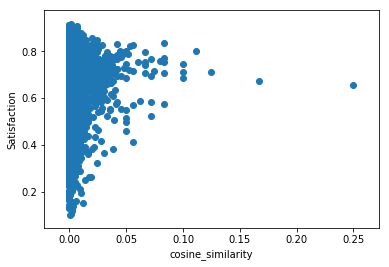

In [228]:
plt.scatter(reviews_X['cosine_similarity'], reviews_X['satisfaction'])
plt.xlabel('cosine_similarity')
plt.ylabel('Satisfaction')
plt.show()

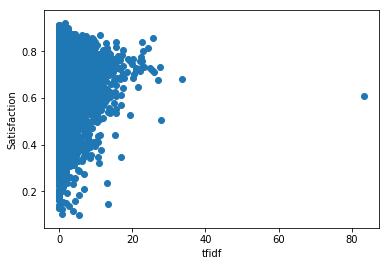

In [229]:
plt.scatter(reviews_X['tfidf'], reviews_X['satisfaction'])
plt.xlabel('tfidf')
plt.ylabel('Satisfaction')
plt.show()

In [230]:
listings['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [231]:
listings_full = listings[listings['room_type'] == 'Entire home/apt']

In [232]:
listings_shared = listings[listings['room_type'] != 'Entire home/apt']

In [233]:
reviews_full = reviews_X[reviews_X['listing_id'].isin(listings_full['id'].unique())]

In [234]:
reviews_shared = reviews_X[reviews_X['listing_id'].isin(listings_shared['id'].unique())]

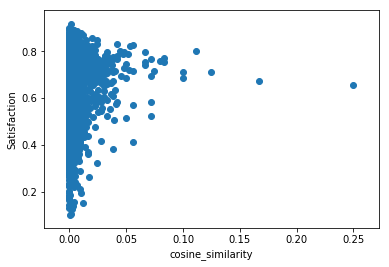

In [235]:
plt.scatter(reviews_full['cosine_similarity'], reviews_full['satisfaction'])
plt.xlabel('cosine_similarity')
plt.ylabel('Satisfaction')
plt.show()

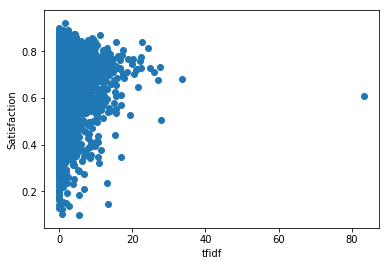

In [236]:
plt.scatter(reviews_full['tfidf'], reviews_full['satisfaction'])
plt.xlabel('tfidf')
plt.ylabel('Satisfaction')
plt.show()

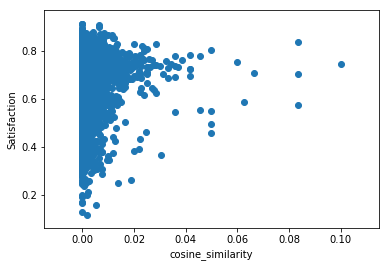

In [237]:
plt.scatter(reviews_shared['cosine_similarity'], reviews_shared['satisfaction'])
plt.xlabel('cosine_similarity')
plt.ylabel('Satisfaction')
plt.show()

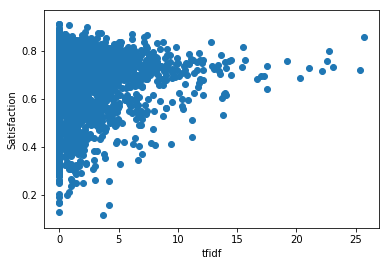

In [238]:
plt.scatter(reviews_shared['tfidf'], reviews_shared['satisfaction'])
plt.xlabel('tfidf')
plt.ylabel('Satisfaction')
plt.show()